<center>
<img src="./pict/pandas_logo.jpg">
<br />
<br />

__Pandas__ - библиотека для работы с панельными данными и временными рядами

Документация: https://pandas.pydata.org

In [1]:
import pandas as pd # импортируем Pandas
%matplotlib inline

In [2]:
# считываем данные
# https://www.kaggle.com/c/titanic/data

data = pd.read_csv('./data/titanic/train.csv') 

In [ ]:
pd.read_excel # из excel

In [ ]:
pd.read_hdf # из hdf

In [ ]:
pd.read_json # из json

In [ ]:
data.to_csv('./data/titanic/train.csv') # сохранение, аналогично для excel, hdf, json

Основные объекты - __DataFrame__ и __Series__

In [3]:
data.head(5) # "голова" таблицы

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail(5) # ее "хвост"

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
type(data), type(data['Pclass'])

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [6]:
data['Survived'].head() # к Series применимы аналогичные методы 

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [7]:
data.Survived.head() # обращаться можно как через [Series_name]
                     # так и через .Series_name

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [8]:
data['Survived'].keys()[:5] # Series можно рассматривать 
                            # как словарь с ключами и значениями

RangeIndex(start=0, stop=5, step=1)

In [9]:
data['Survived'].values[:5] # значения

array([0, 1, 1, 1, 0])

In [10]:
data.columns # DataFrame так же можно рассматривать как словарь, 
             # столцы - ключи, Series - значения

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
data.values[:5] # значения

array([[1, 0, 3, 'Braund, Mr. Owen Harris', 'male', 22.0, 1, 0,
        'A/5 21171', 7.25, nan, 'S'],
       [2, 1, 1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
        'female', 38.0, 1, 0, 'PC 17599', 71.2833, 'C85', 'C'],
       [3, 1, 3, 'Heikkinen, Miss. Laina', 'female', 26.0, 0, 0,
        'STON/O2. 3101282', 7.925, nan, 'S'],
       [4, 1, 1, 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
        'female', 35.0, 1, 0, '113803', 53.1, 'C123', 'S'],
       [5, 0, 3, 'Allen, Mr. William Henry', 'male', 35.0, 0, 0,
        '373450', 8.05, nan, 'S']], dtype=object)

In [12]:
data.index[:5] # каждая строка проиндексирована, 
               # к индексу можно обратиться через атрибут

RangeIndex(start=0, stop=5, step=1)

In [13]:
data.loc[10, 'Cabin'] # обращение по индексу, столбцу

'G6'

In [14]:
data.iloc[10]['Cabin'] # через целочисленный порядок

'G6'

In [15]:
data.dtypes # data.Survived.astype(type) - изменение типа Survived

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
data.shape # форма таблицы, по аналогии с numpy

(891, 12)

Несколько полезных методов:

In [17]:
data.drop_duplicates(subset=['Age']) # убираем полные дубли, 
                                            # можно конкретизировать по определенным столбцам

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
767,768,0,3,"Mangan, Miss. Mary",female,30.50,0,0,364850,7.7500,NaN,Q
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.50,0,0,2683,6.4375,NaN,C


In [18]:
data.dropna(subset=['Cabin']).head() # убираем nan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [19]:
data.Cabin.fillna('Не было заполнено')[:5] # заполнение NaN

0    Не было заполнено
1                  C85
2    Не было заполнено
3                 C123
4    Не было заполнено
Name: Cabin, dtype: object

In [20]:
 data.Cabin.fillna(method='ffill').head() # заполняем соседними значениями: forward заполнение

0     NaN
1     C85
2     C85
3    C123
4    C123
Name: Cabin, dtype: object

In [21]:
data.describe() # различные статистики

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
data.describe(include=['object']).T # только категориальные признаки

,count,unique,top,freq
Name,891,891,"Dooley, Mr. Patrick",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,C23 C25 C27,4
Embarked,889,3,S,644


In [23]:
data.describe(include=['int64']).T # только вещественные

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
SibSp,891.0,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0


In [24]:
data.sort_values(['Age', 'Fare'], ascending=[False, True]).head() # сортируем по столбцам, 
                                                                 # по индексам - .sort_index()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q


In [25]:
data.Age.nsmallest(4) # 5 наименьших, 
                     # наибольших - .nlargest(5)

803    0.42
755    0.67
469    0.75
644    0.75
Name: Age, dtype: float64

In [26]:
data.Age.idxmax() # индекс максимального
                    # индекс минимального .idxmin

630

In [27]:
data.Age.rank(method='first', ascending=True).head() # ранг, номера возрастов по возрастанию

0    205.0
1    527.0
2    302.0
3    480.0
4    481.0
Name: Age, dtype: float64

In [28]:
data.Name.unique()[:5] # уникальные значения
                        # .nunique() - количество уникальных элементов

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry'], dtype=object)

In [29]:
# массовое изменение данных
data.Sex.replace({'male':'M', 'female':'F'}, inplace=False).head() # можно и через .map

0    M
1    F
2    F
3    F
4    M
Name: Sex, dtype: object

Маски в Pandas

In [30]:
((data['Pclass'] == 3) & (data['Sex'] == 'male')).head(5) # маска: пассажиры в 3 классе, мужчины 

0     True
1    False
2    False
3    False
4     True
dtype: bool

In [31]:
data[(data['Pclass'] == 3) & (data['Sex'] == 'male')].head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


In [32]:
data[data.Pclass.isin([2, 3])].head() # маска с проверкой на вхождение

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [33]:
data.Cabin.isnull()[:5] # маска для nan

0     True
1    False
2     True
3    False
4     True
Name: Cabin, dtype: bool

In [34]:
data[data.Cabin.isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


Создание, изменение, удаление элементов __DataFrame__

In [35]:
pd.DataFrame({'Age': [16, 20, 43], 'Sex':['F', 'M', 'M'], 'Name':['Masha', 'Misha', 'Ivan']},
                index = pd.date_range(start='2021-01-01', periods=3)) # создание DataFrame

,Age,Sex,Name
2021-01-01,16,F,Masha
2021-01-02,20,M,Misha
2021-01-03,43,M,Ivan


In [36]:
data.drop([0, 1], axis=0, inplace=False).head() # удаление строк

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [37]:
data.drop(['PassengerId', 'Survived'], axis=1, inplace=False).head() # удаление столбцов

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
data.rename(columns={'Pclass':'Class'}).head() # переименование строк / столбцов

,PassengerId,Survived,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
data.reindex(index=data.index[::-1]).head() # изменение индекса

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S


In [40]:
data.insert(loc=4, column='test', value=range(len(data))) # вставка столбца в заданную локацию
data.head() # data['test'] = ... - вставка справа с конца

,PassengerId,Survived,Pclass,Name,test,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",2,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",4,male,35.0,0,0,373450,8.0500,NaN,S


Слияние __DataFrame__

In [41]:
right = pd.DataFrame({'Passenger':[1, 2, 3], 'New Value':[-24, 23, 1]})
left = data[data.Cabin.isnull()].head()

pd.merge(left, right, left_on='PassengerId', right_on='Passenger', how='inner')

,PassengerId,Survived,Pclass,Name,test,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger,New Value
0,1,0,3,"Braund, Mr. Owen Harris",0,male,22.0,1,0,A/5 21171,7.250,NaN,S,1,-24
1,3,1,3,"Heikkinen, Miss. Laina",2,female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S,3,1


In [42]:
left.append(right).tail(5) # вертикальная конкатенация

,PassengerId,Survived,Pclass,Name,test,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger,New Value
5,6.0,0.0,3.0,"Moran, Mr. James",5.0,male,NaN,0.0,0.0,330877,8.4583,NaN,Q,NaN,NaN
7,8.0,0.0,3.0,"Palsson, Master. Gosta Leonard",7.0,male,2.0,3.0,1.0,349909,21.0750,NaN,S,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,-24.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,23.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0


In [43]:
pd.concat([left, right], axis=1) # и вертикальная и горизонтальная конкатенация
                                 # работает с произвольным числом DataFrame

,PassengerId,Survived,Pclass,Name,test,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Passenger,New Value
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",0.0,male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,1.0,-24.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,23.0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",2.0,female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,3.0,1.0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",4.0,male,35.0,0.0,0.0,373450,8.0500,NaN,S,NaN,NaN
5,6.0,0.0,3.0,"Moran, Mr. James",5.0,male,NaN,0.0,0.0,330877,8.4583,NaN,Q,NaN,NaN
7,8.0,0.0,3.0,"Palsson, Master. Gosta Leonard",7.0,male,2.0,3.0,1.0,349909,21.0750,NaN,S,NaN,NaN


Группировка даннных

In [44]:
grs = data.groupby(['Pclass']) # особый объект DataFrameGroupBy
grs

In [45]:
grs.groups # какие элементы попали в какие группы

{1: [1, 3, 6, 11, 23, 27, 30, 31, 34, 35, 52, 54, 55, 61, 62, 64, 83, 88, 92, 96, 97, 102, 110, 118, 124, 136, 137, 139, 151, 155, 166, 168, 170, 174, 177, 185, 187, 194, 195, 209, 215, 218, 224, 230, 245, 248, 252, 256, 257, 258, 262, 263, 268, 269, 270, 273, 275, 284, 290, 291, 295, 297, 298, 299, 305, 306, 307, 309, 310, 311, 318, 319, 325, 329, 331, 332, 334, 336, 337, 339, 341, 351, 356, 366, 369, 370, 373, 375, 377, 380, 383, 390, 393, 412, 430, 434, 435, 438, 445, 447, ...], 2: [9, 15, 17, 20, 21, 33, 41, 43, 53, 56, 58, 66, 70, 72, 78, 84, 98, 99, 117, 120, 122, 123, 133, 134, 135, 144, 145, 148, 149, 150, 161, 178, 181, 183, 190, 191, 193, 199, 211, 213, 217, 219, 221, 226, 228, 232, 234, 236, 237, 238, 239, 242, 247, 249, 259, 265, 272, 277, 288, 292, 303, 308, 312, 314, 316, 317, 322, 323, 327, 340, 342, 343, 344, 345, 346, 357, 361, 385, 387, 389, 397, 398, 399, 405, 407, 413, 416, 417, 418, 426, 427, 432, 437, 439, 440, 443, 446, 450, 458, 463, ...], 3: [0, 2, 4, 5, 7, 8, 

In [46]:
grs.get_group(1).head() # выбрать группу

,PassengerId,Survived,Pclass,Name,test,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3,female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",6,male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",11,female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",23,male,28.0,0,0,113788,35.5000,A6,S


Агрегирование

In [47]:
data.groupby(['Age'], as_index=False)['Fare'].median().tail() # для каждого уникального возраста 
                                                              # находим медианную цену билета

,Age,Fare
83,70.0,40.7500
84,70.5,7.7500
85,71.0,42.0792
86,74.0,7.7750
87,80.0,30.0000


In [48]:
import numpy as np

data.groupby(['Age'])['Fare'].aggregate([min, np.mean, max]).tail() # группировка по одному столбцу

,min,mean,max
Age,,,
70.0,10.5000,40.7500,71.0000
70.5,7.7500,7.7500,7.7500
71.0,34.6542,42.0792,49.5042
74.0,7.7750,7.7750,7.7750
80.0,30.0000,30.0000,30.0000


In [49]:
# группировка по нескольким столбцам, агрегация по одному столбцу

data.groupby(['Pclass', 'Age'])['Fare'].aggregate([min, np.median, max]).reset_index().tail() 

,Pclass,Age,min,median,max
177,3,61.0,6.2375,6.2375,6.2375
178,3,63.0,9.5875,9.5875,9.5875
179,3,65.0,7.7500,7.7500,7.7500
180,3,70.5,7.7500,7.7500,7.7500
181,3,74.0,7.7750,7.7750,7.7750


In [50]:
# группировка по нескольким столбцам, агрегация по нескольким столбцам

data.groupby(['Pclass', 'Age'])[['Fare', 'SibSp']].aggregate([min, np.median, max])

Fare                     SibSp           
                   min    median       max   min median max
Pclass Age                                                 
1      0.92   151.5500  151.5500  151.5500     1    1.0   1
       2.00   151.5500  151.5500  151.5500     1    1.0   1
       4.00    81.8583   81.8583   81.8583     0    0.0   0
       11.00  120.0000  120.0000  120.0000     1    1.0   1
       14.00  120.0000  120.0000  120.0000     1    1.0   1
...                ...       ...       ...   ...    ...  ..
3      61.00    6.2375    6.2375    6.2375     0    0.0   0
       63.00    9.5875    9.5875    9.5875     0    0.0   0
       65.00    7.7500    7.7500    7.7500     0    0.0   0
       70.50    7.7500    7.7500    7.7500     0    0.0   0
       74.00    7.7750    7.7750    7.7750     0    0.0   0

[182 rows x 6 columns]

In [51]:
# можно точечно указать функции агрегирования через dict

data.groupby(['Pclass', 'Age'])[['Fare', 'SibSp']].aggregate({'Fare':np.median, 'SibSp':np.max})

Fare  SibSp
Pclass Age                   
1      0.92   151.5500      1
       2.00   151.5500      1
       4.00    81.8583      0
       11.00  120.0000      1
       14.00  120.0000      1
...                ...    ...
3      61.00    6.2375      0
       63.00    9.5875      0
       65.00    7.7500      0
       70.50    7.7500      0
       74.00    7.7750      0

[182 rows x 2 columns]

Трансформация

In [52]:
normalization = lambda x: x / sum(x)

data.groupby(['Pclass'])['Fare'].transform(normalization).head()

0    0.001080
1    0.003922
2    0.001180
3    0.002921
4    0.001199
Name: Fare, dtype: float64

In [53]:
data.groupby(['Pclass'])['Fare'].apply(lambda x: x / sum(x)).head() # нормировка по столбцу с помощью apply

0    0.001080
1    0.003922
2    0.001180
3    0.002921
4    0.001199
Name: Fare, dtype: float64

Фильтрация

In [54]:
data.groupby(['Name']).filter(lambda x: x['Fare'] > 100).head() # пассажиры с ценой билета выше 100$

,PassengerId,Survived,Pclass,Name,test,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",27,male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",31,female,NaN,1,0,PC 17569,146.5208,B78,C
88,89,1,1,"Fortune, Miss. Mabel Helen",88,female,23.0,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",118,male,24.0,0,1,PC 17558,247.5208,B58 B60,C
195,196,1,1,"Lurette, Miss. Elise",195,female,58.0,0,0,PC 17569,146.5208,B80,C


In [55]:
data[data['Name'].map(lambda x: x.startswith('B'))].head() # еще пример фильтрации

,PassengerId,Survived,Pclass,Name,test,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,male,22.0,1,0,A/5 21171,7.2500,NaN,S
11,12,1,1,"Bonnell, Miss. Elizabeth",11,female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",21,male,34.0,0,0,248698,13.0000,D56,S
74,75,1,3,"Bing, Mr. Lee",74,male,32.0,0,0,1601,56.4958,NaN,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",85,female,33.0,3,0,3101278,15.8500,NaN,S


Создание переменных

In [56]:
pd.cut(data.Fare, 10).head() # разбиение признака на интервалы

0     (-0.512, 51.233]
1    (51.233, 102.466]
2     (-0.512, 51.233]
3    (51.233, 102.466]
4     (-0.512, 51.233]
Name: Fare, dtype: category
Categories (10, interval[float64]): [(-0.512, 51.233] < (51.233, 102.466] < (102.466, 153.699] < (153.699, 204.932] ... (307.398, 358.63] < (358.63, 409.863] < (409.863, 461.096] < (461.096, 512.329]]

In [57]:
pd.value_counts(pd.cut(data.Fare, 10)) # рассчитывает количество элементов в бине

(-0.512, 51.233]      732
(51.233, 102.466]     106
(102.466, 153.699]     31
(204.932, 256.165]     11
(256.165, 307.398]      6
(461.096, 512.329]      3
(153.699, 204.932]      2
(409.863, 461.096]      0
(358.63, 409.863]       0
(307.398, 358.63]       0
Name: Fare, dtype: int64

In [58]:
pd.DataFrame(pd.value_counts(pd.cut(data.Fare, 10))) # создание категориального признака из непрерывного

,Fare
"(-0.512, 51.233]",732
"(51.233, 102.466]",106
"(102.466, 153.699]",31
"(204.932, 256.165]",11
"(256.165, 307.398]",6
"(461.096, 512.329]",3
"(153.699, 204.932]",2
"(409.863, 461.096]",0
"(358.63, 409.863]",0
"(307.398, 358.63]",0


In [59]:
pd.crosstab(data['Sex'], data['Pclass']) # со-встречаемость признаков

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [60]:
pd.get_dummies(data['Sex']).head() # создание dumpy переменных

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


Немного Титанике...

In [61]:
print('Количество пассажиров: ', data.PassengerId.nunique())
print('Процент выживших: {} %'.format(int(100 * data['Survived'].sum() / data.PassengerId.nunique())))

Количество пассажиров:  891
Процент выживших: 38 %


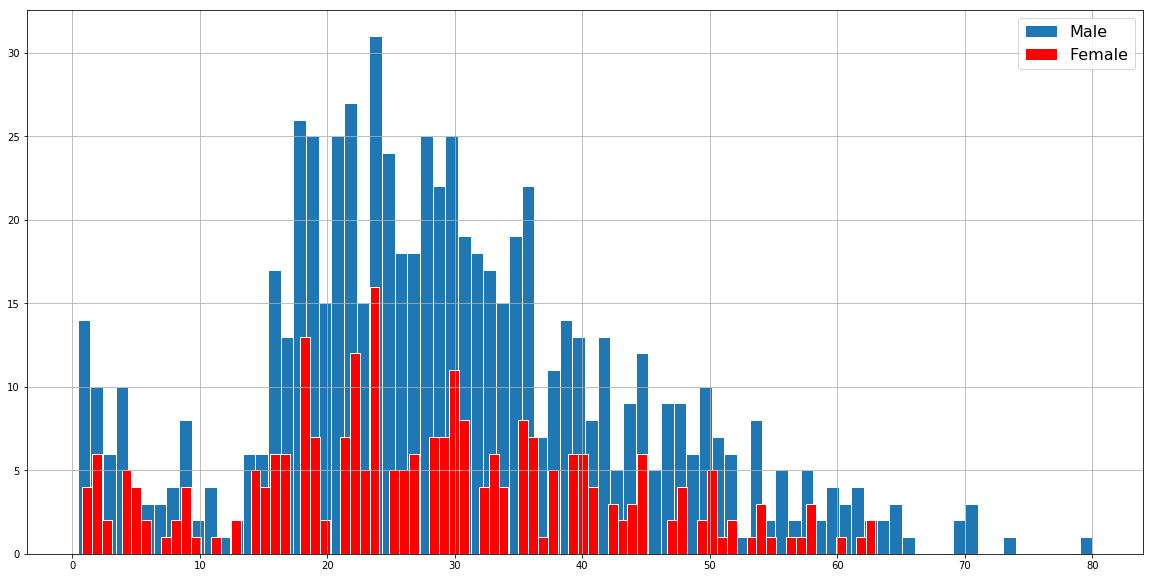

In [62]:
ax = data['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', grid=True)

data[data['Sex'] == 'female']['Age'].hist(figsize=(20, 10), bins=80, 
                                          edgecolor='white', grid=True, color='red')
ax.legend(['Male', 'Female'], prop={'size':16})

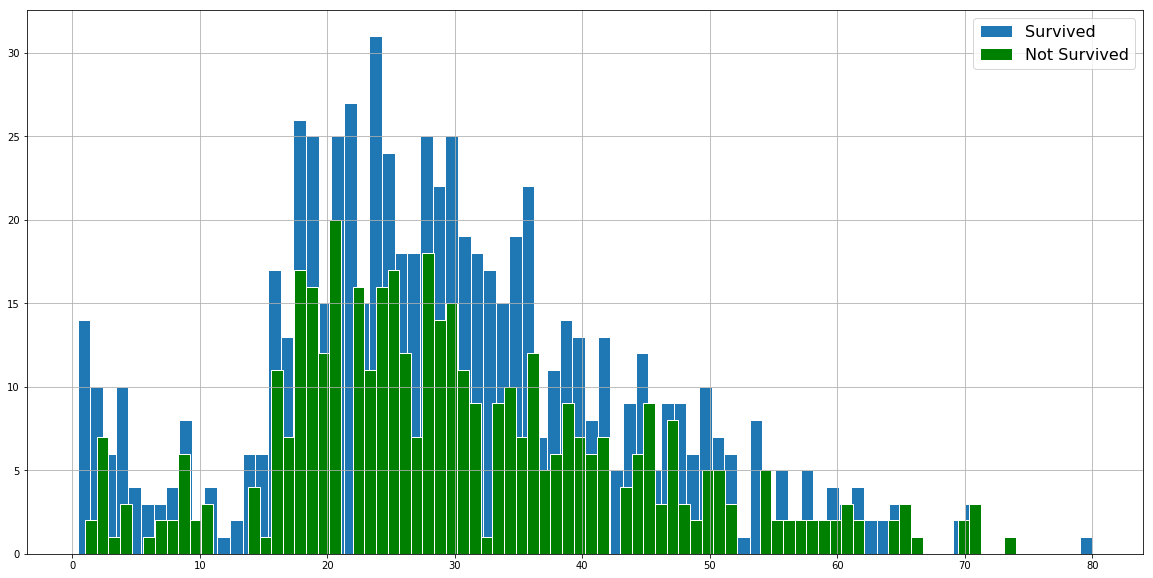

In [63]:
ax = data['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', grid=True)

data[data['Survived'] == 0]['Age'].hist(figsize=(20, 10), bins=80, 
                                          edgecolor='white', grid=True, color='green')
ax.legend(['Survived', 'Not Survived'], prop={'size':16})

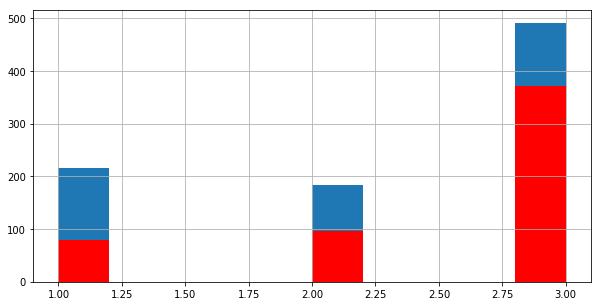

In [64]:
data.Pclass.hist(figsize=(10, 5))
data[data['Survived'] == 0].Pclass.hist(color='red', grid=True)

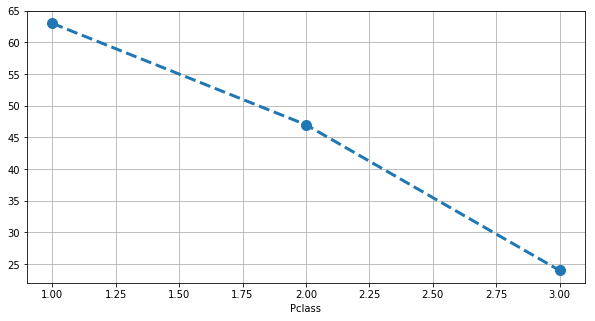

In [65]:
series = round(100 * data.groupby(['Pclass'])['Survived'].sum() / data.groupby(['Pclass'])['PassengerId'].nunique())
series.plot(figsize=(10, 5), linestyle='--', marker='o', markersize=10, grid=True, lw=3)

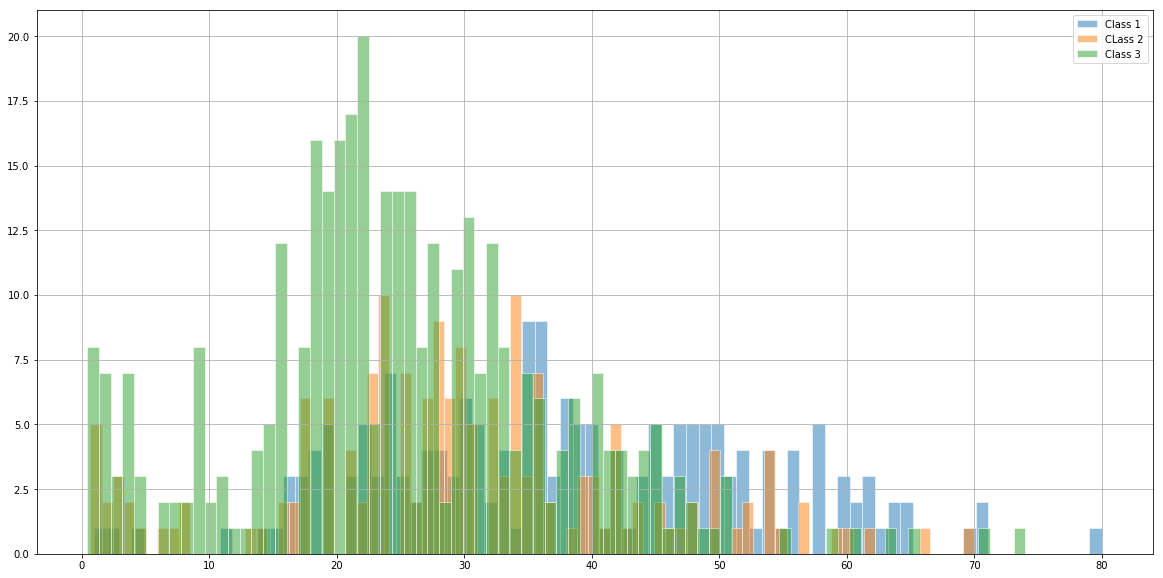

In [66]:
ax =data[data.Pclass == 1]['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', alpha=0.5)
data[data.Pclass == 2]['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', alpha=0.5)
data[data.Pclass == 3]['Age'].hist(figsize=(20, 10), bins=80, edgecolor='white', alpha=0.5)

ax.legend(['Class 1', 'CLass 2', 'Class 3'])

In [67]:
data['Family'] = data['SibSp'] + data['Parch']

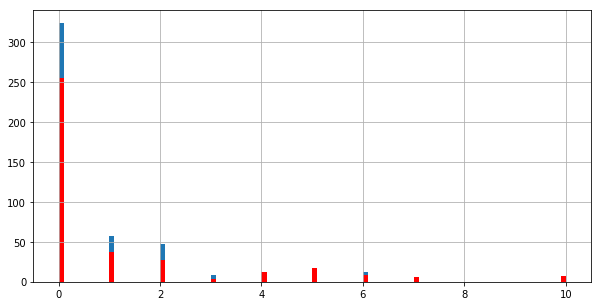

In [68]:
data[data.Pclass == 3]['Family'].hist(figsize=(10, 5), bins=100)
data[(data.Pclass == 3) & (data.Survived == 0)]['Family'].hist(figsize=(10, 5), color='red', bins=100)

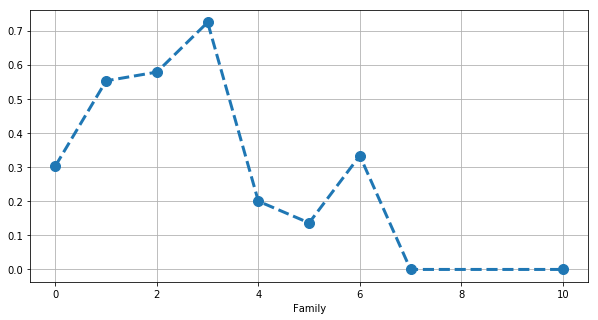

In [69]:
series = data.groupby(['Family'])['Survived'].sum() / data.groupby(['Family'])['Survived'].count()
series.plot(figsize=(10, 5), linestyle='--', marker='o', markersize=10, grid=True, lw=3)

### Спасибо за внимание!
### Вопросы?